In [153]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
import requests
import csv

# File to Load 
file_to_load = "Resources/Wine_Bottled_2019.csv"

# Read Purchasing File and store into Pandas data frame
wine_data = pd.read_csv(file_to_load)
wine_df = wine_data
wine_df.head(1000)

,State,# of Bottled Still Wines,# of Bottled Effervescence Wines,Month,Year
0,Alabama,30153,200,December,2019
1,Alaska,5247,0,December,2019
2,Arizona,80784,2059,December,2019
3,Arkansas,24197,0,December,2019
4,California,39007466,1110404,December,2019
...,...,...,...,...,...
540,Wisconsin,353647,496,March,2019
541,Wisconsin,156990,0,May,2019
542,Wisconsin,132404,1063,November,2019
543,Wisconsin,257117,483,October,2019


In [154]:
wine_df.dtypes

State                               object
# of Bottled Still Wines             int64
# of Bottled Effervescence Wines     int64
Month                               object
Year                                 int64
dtype: object

In [155]:
# of Bottled Still Wines by state
bottled_wine = wine_df.copy()
bottled_wine.columns = ['State', 'Still', 'Effervescence', 'Month', 'Year']
bottled_wine

,State,Still,Effervescence,Month,Year
0,Alabama,30153,200,December,2019
1,Alaska,5247,0,December,2019
2,Arizona,80784,2059,December,2019
3,Arkansas,24197,0,December,2019
4,California,39007466,1110404,December,2019
...,...,...,...,...,...
540,Wisconsin,353647,496,March,2019
541,Wisconsin,156990,0,May,2019
542,Wisconsin,132404,1063,November,2019
543,Wisconsin,257117,483,October,2019


In [163]:
#Change Month to date time
#wine_df = pd.to_datetime(wine_df['Month'])
wine_time = pd.to_datetime(bottled_wine['Year'].astype(str)  + bottled_wine['Month'], format='%Y%B')
wine_time

0     2019-12-01
1     2019-12-01
2     2019-12-01
3     2019-12-01
4     2019-12-01
         ...    
540   2019-03-01
541   2019-05-01
542   2019-11-01
543   2019-10-01
544   2019-09-01
Length: 545, dtype: datetime64[ns]

In [181]:
#Change Month to date time
#wine_df = pd.to_datetime(wine_df['Month'])
time = pd.to_datetime(bottled_wine['Month'].astype(str) + bottled_wine['Year'].astype(str), format='%B%Y')
time = pd.DataFrame({"Date": wine_time})


In [186]:
#Add Time Column to bottled_wine
bottled_wine['Time'] = time
clean_wine = bottled_wine.drop(['Month', 'Year'], axis = 1)
clean_wine

,State,Still,Effervescence,Time
0,Alabama,30153,200,2019-12-01
1,Alaska,5247,0,2019-12-01
2,Arizona,80784,2059,2019-12-01
3,Arkansas,24197,0,2019-12-01
4,California,39007466,1110404,2019-12-01
...,...,...,...,...
540,Wisconsin,353647,496,2019-03-01
541,Wisconsin,156990,0,2019-05-01
542,Wisconsin,132404,1063,2019-11-01
543,Wisconsin,257117,483,2019-10-01


In [189]:
#month_group = effervescence_wine.groupby("Month")
month_group = clean_wine.groupby(by=["Time"]).sum()
month_group

,Still,Effervescence
Time,,
2019-01-01,57317576,2000126
2019-02-01,52903691,2466747
2019-03-01,66426730,2565256
2019-04-01,68969661,1781979
2019-05-01,15558026,45889
2019-06-01,11865426,42133
2019-07-01,62131857,2989345
2019-08-01,31226642,43392
2019-09-01,63496913,3432491


<AxesSubplot:xlabel='Time'>

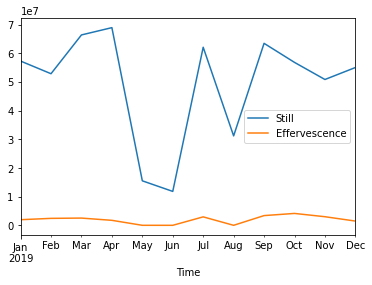

In [190]:
month_group.plot.line()